<a href="https://colab.research.google.com/github/marlapinkert/TEWA2/blob/main/01_Intro_Python_Colab_Nilearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Google Colab, Python & Nilearn

In this very first session we will look at how to use Google Colab and attempt some first steps in Python and Nilearn. We will practice some very basic Python - I assume it is most helpful for you to complete the DataCamp tutorials (*Introduction to Python* & *Intermediate Python*), which is why there is some time reserved for that at the end of the session.

After today, you will probably be able to
- Navigate Google Colab
- Write and understand basic Python code
- Plot an anatomical image using Nilearn

## 1. Intro to Colab
Google Colab allows us to use Jupyter Notebooks with no setup required, for free.

While this is a big advantage, especially in this setting, there are also disadvantages: If our runtime disconnects, we lose **everything** - any files, any variables, any packages we installed. Runtimes shut down automatically after 180 minutes of inactivity. Keep this in mind so you save any important files in time! If you usually use Jupyter Lab and have it set up, feel free to use that instead of Colab. However, in certain sessions, I will tell you to use Colab to avoid complicated installations required for certain programms.


### Writing Code and Text


In a Jupyter Notebook, there are text cells, and code cells. This right here is a text cell. The one below this one is a code cell. You can try creating some yourself by clicking on "+ Code" or "+ Text".

In [ ]:
print("I am a code cell")

I am a code cell


### Folders & Files in Colab

Colab is not connected to your local directories. Therefore, if we want to use any of our files, we have to upload them first. You can do so by clicking on the little folder on the left, and then clicking on the little upload symbol (both marked yellow below).

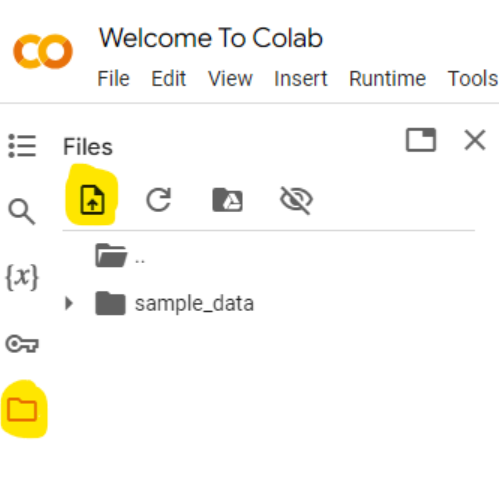

When starting a new runtime on Colab, we start out in the ```/content``` folder - this is our "working directory". If you go ahead and click on the little open folder (marked yellow in the screenshot below), you can see the complete directory structure innate to Colab.

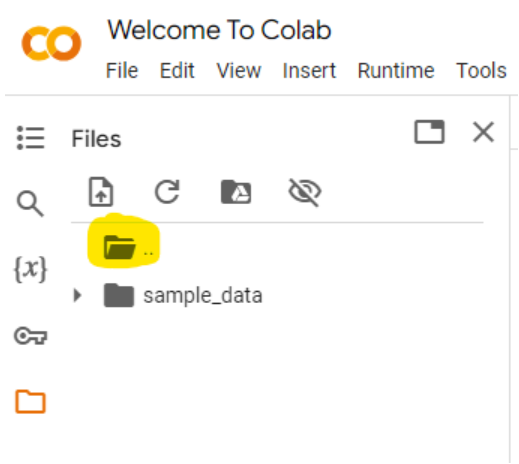

## 2. Intro to Python

Python is a relatively popular programming language and what we will use for our data analyses. I am confident you will feel comfortable using it very soon, if you don't do so already. Let's look at the very basics.

We can store data values in "variables". This is as simple as typing the following:

In [ ]:
x = "Hello"
y = 10
print(x)
print(y)

Hello
10


If we want to use ```strings``` we have to add the quotation marks - as you can see, the following fails:

In [ ]:
x = hello

NameError: name 'hello' is not defined

We can make lists out of things, if we add brackets around them:

In [ ]:
my_list_of_ints = [1,3,6,9]
my_list_of_strings = ["once", "upon", "a", "time"]
print(my_list_of_ints)
print(my_list_of_strings)

[1, 3, 6, 9]
['once', 'upon', 'a', 'time']


### Functions

Many times when programming we use "functions", such as ```print()```, which we can pass data into, which they then use to perform a certain task. In the case of ```print()```, this task is printing out our variables.

We can import packages into python, which supply us with more functions to use. One very common one is numpy. Let's use ```numpy.sum()``` to add up all elements of our list called ```my_list_of_ints```.

In [ ]:
import numpy as np

np.sum(my_list_of_ints)

19

We can also write our own functions - see below:

In [ ]:
def multiply(a, b):
    res = a * b
    return res

In [ ]:
print(multiply(a = 3, b = 5))
print(multiply(3, 5))

15
15


### Loops

We can use ```for``` loops to "iterate" over sequences (such as lists).

In [ ]:
for element in my_list_of_strings:
    print(element)

once
upon
a
time


## 3. Intro to NIPY/Nilearn

Today, we will have a first look at fMRI data using **Nilearn**. Nilearn is a python package which is part of the **NIPY** ecosystem. The NIPY community has developed different projects which evolve around analysis of neuroimaging data using **Python**. Here in our class we will use three of them:

- **Nipype**: Interface for existing software
- **Nibabel**: Working with common neuroimaging file formats
- **Nilearn**: Made for statistical learning with neuroimaging data, we use it for first and second level analysis & plotting

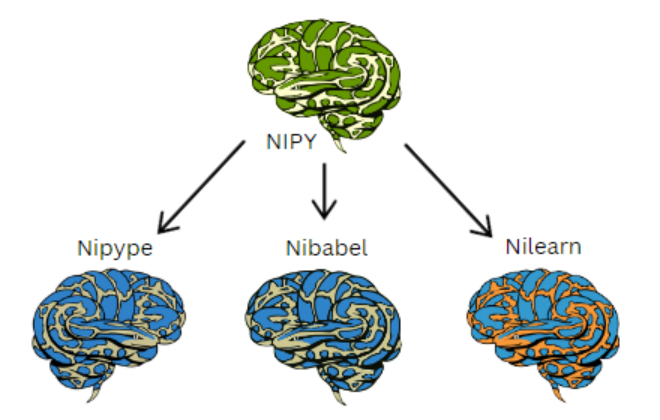

### Preparations - Importing Packages and Datasets

We start by installing the package.

In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 57.6 MB/s eta 0:00:00


As a quick start to using nilearn we will just look at some of the plotting options it provides. This will also allow us to get a quick feel for the different types of data we will be working with. A very practical functionality of Nilearn is the automatic fetching of different datasets. We will use this often to get some data to practice on.

In [ ]:
from nilearn import datasets
import re
from pprint import pprint

_, urls = datasets.fetch_ds000030_urls()

reg_list = [".*59_T1w.nii.gz", ".*59_task-bart_bold.nii.gz",".*59_T1w_preproc.nii.gz", ".*59_task-bart_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"]
file_list = []
for element in reg_list:
  r = re.compile(element)
  file_list.extend(list(filter(r.match, urls)))

data_dir, _ = datasets.fetch_openneuro_dataset(urls=file_list)

data_dir

'/root/nilearn_data/ds000030/ds000030_R1.0.4/uncompressed'

### Plotting

To plot the data we just downloaded, we will first have to find it. By opening our file browser and navigating to ```root/nilearn_data```, we can find three subject folders, and one ```/derivatives```folder. The ```/derivatives```folder contains data that has already been preprocessed. The subject folders each contain subfolders called ```/anat``` and ```/func```, which corresponds to "anatomical file(s)" and "functional file(s)" respectively.

This organization of our data structure did not happen by chance. It follows the Brain Imaging Data Structure, short BIDS. This is a specification on how to organize neuroimaging data. BIDS was created to keep confusion when navigating a dataset to a minimum. As neuroimaging results in big complex datasets, this is a timesaver and important for reproducibility.

To tell ```Nilearn``` where to find our data, we can create a variable which contains the exact path pointing to our file.

In [ ]:
anat_path = "/root/nilearn_data/ds000030/ds000030_R1.0.4/uncompressed/sub-10159/anat/sub-10159_T1w.nii.gz"


Now that we found our data, we can do some plotting. Nilearn's ```plotting``` module provides different functions, we will use ```plot_anat``` which is meant for plotting anatomical data (3D images). We first have to import it, of course.


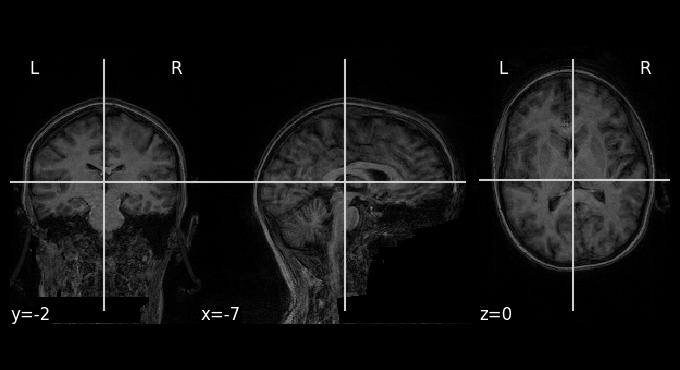

In [ ]:
from nilearn import plotting

plotting.plot_anat(anat_path)


As you can see, plotting with Nilearn is very straightforward - we only provided one parameter! However, there are many more we may choose to use.

When we encounter a new function, ```help()``` can help us to figure out which parameters we need/want to enter. The same information can be found by looking up nilearn.plotting.plot_anat, which would probably lead you here: https://nilearn.github.io/stable/modules/generated/nilearn.plotting.plot_anat.html

In [ ]:
help(plotting.plot_anat)

Help on function plot_anat in module nilearn.plotting.img_plotting:

plot_anat(anat_img=<MNI152Template>, cut_coords=None, output_file=None, display_mode='ortho', figure=None, axes=None, title=None, annotate=True, threshold=None, draw_cross=True, black_bg='auto', dim='auto', cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7a51f01c6080>, colorbar=False, cbar_tick_format='%.2g', radiological=False, vmin=None, vmax=None, **kwargs)
    Plot cuts of an anatomical image.
    
    By default 3 cuts: Frontal, Axial, and Lateral.
    
    Parameters
    ----------
    anat_img : Niimg-like object, default=MNI152TEMPLATE
        See :ref:`extracting_data`.
        The anatomical image to be used as a background. If None is
        given, nilearn tries to find a T1 template.
    
    cut_coords : None, a :obj:`tuple` of :obj:`float`, or :obj:`int`, optional
        The MNI coordinates of the point where the cut is performed.
    
            - If `display_mode` is `'ortho'` or `'tiled

Later on, you will use more of these parameters during the group excersises, but for now ```anat_img``` and ```title``` will be enough. We can now plot all three subjects' anatomical images next to each other.


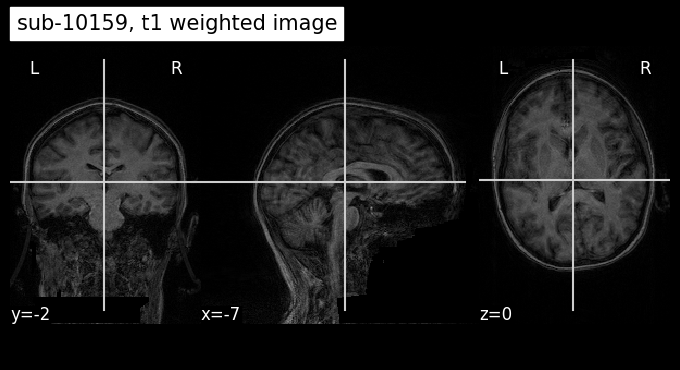

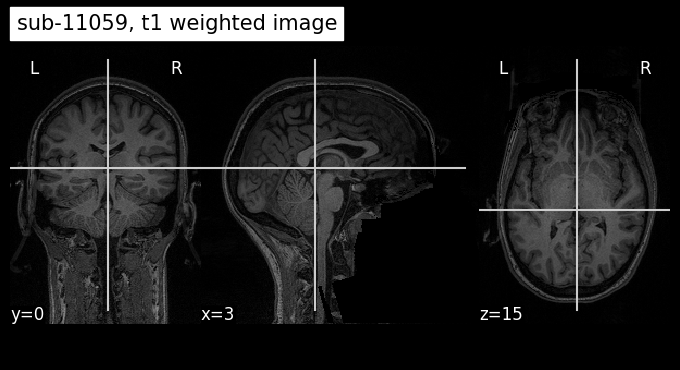

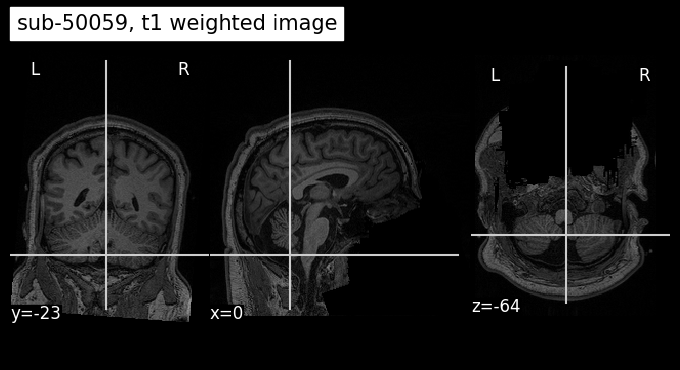

In [ ]:
sub10159_path = "/root/nilearn_data/ds000030/ds000030_R1.0.4/uncompressed/sub-10159/anat/sub-10159_T1w.nii.gz"
sub11059_path = "/root/nilearn_data/ds000030/ds000030_R1.0.4/uncompressed/sub-11059/anat/sub-11059_T1w.nii.gz"
sub50059_path = "/root/nilearn_data/ds000030/ds000030_R1.0.4/uncompressed/sub-50059/anat/sub-50059_T1w.nii.gz"

plotting.plot_anat(anat_img = sub10159_path, title="sub-10159, t1 weighted image")
plotting.plot_anat(anat_img = sub11059_path, title="sub-11059, t1 weighted image")
plotting.plot_anat(anat_img = sub50059_path, title="sub-50059, t1 weighted image")


We can use the same function to plot our functional images. However, there is one caveat: ```plot_anat()``` can only be used for three dimensional files, but functional images are four dimensional. One very simple fix is to use ```mean_img``` from Nilearn to create a mean functional image.

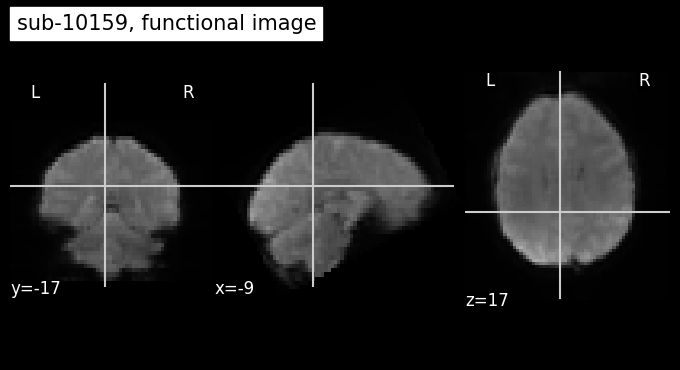

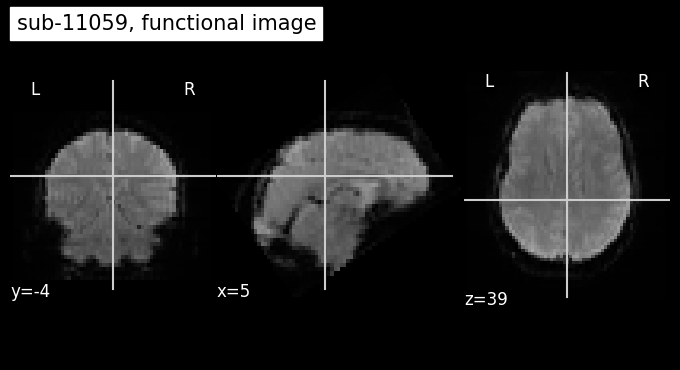

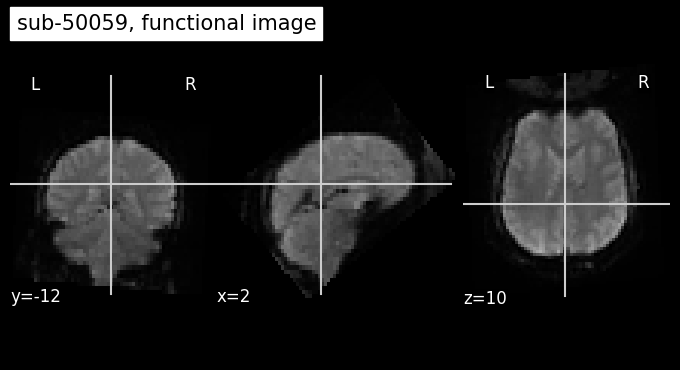

In [ ]:
from nilearn.image import mean_img

sub10159_func_path = "/root/nilearn_data/ds000030/ds000030_R1.0.4/uncompressed/sub-10159/func/sub-10159_task-bart_bold.nii.gz"
sub11059_func_path = "/root/nilearn_data/ds000030/ds000030_R1.0.4/uncompressed/sub-11059/func/sub-11059_task-bart_bold.nii.gz"
sub50059_func_path = "/root/nilearn_data/ds000030/ds000030_R1.0.4/uncompressed/sub-50059/func/sub-50059_task-bart_bold.nii.gz"

plotting.plot_anat(mean_img(sub10159_func_path), title="sub-10159, functional image")
plotting.plot_anat(mean_img(sub11059_func_path), title="sub-11059, functional image")
plotting.plot_anat(mean_img(sub50059_func_path), title="sub-50059, functional image")


## Group Excersises

Navigate to ```/root/nilearn_data/ds000030/ds000030_R1.0.4/uncompressed/derivatives```. This folder contains the preprocessed data for our three subjects.

1. For each subject, plot both the "raw" functional image (as we did above) and the functional  images. Do the same for the raw and preprocessed anatomical images. Is there anything you notice when comparing them?

2. Try plotting one of the preprocessed anatomical images using different "cuts" (sagittal, coronal, axial) and without drawing a cross on the image. Set a title for each one.

3. Try using ```plotting.plot_anat()``` without passing any arguments to the functions and see what happens :)

## Bonus Excersise

Use ```plotting.plot_stat_map``` to plot the image below! If you want, try looking at the documentation to find out how you can set a "threshold".

In [ ]:
stat_map_ = datasets.load_sample_motor_activation_image()

